In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [27]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [28]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [30]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

rikitea pf
port elizabeth za
angoche mz
coffs harbour au
mataura pf
nanortalik gl
hasaki jp
ushuaia ar
puerto ayora ec
taolanaro mg
osakarovka kz
bilopillya ua
lithakia gr
rikitea pf
saint george bm
dikson ru
igarka ru
ribeira grande pt
new norfolk au
toulepleu ci
ushuaia ar
coquimbo cl
port alfred za
pitiquito mx
mutsamudu km
san rafael bo
bambous virieux mu
tzaneen za
tiksi ru
lively ca
albany au
nizhneyansk ru
new norfolk au
dalbandin pk
yerbogachen ru
butaritari ki
zabaykalsk ru
san jose gt
ribeira grande pt
kloulklubed pw
tasiilaq gl
narsaq gl
carnarvon au
burnie au
tasiilaq gl
albany au
ribeira grande pt
pangody ru
punta arenas cl
illoqqortoormiut gl
mataura pf
fort payne us
arraial do cabo br
taolanaro mg
sioux lookout ca
baykit ru
bereda so
talnakh ru
jamestown sh
hermanus za
hithadhoo mv
verkhnevilyuysk ru
punta arenas cl
kurilsk ru
nishihara jp
wanning cn
bredasdorp za
port elizabeth za
moyale et
arraial do cabo br
rawannawi ki
sisimiut gl
saint-philippe re
busselton au
ushua

torbay ca
khatanga ru
kodiak us
faanui pf
martinsburg us
gat ly
santa isabel do rio negro br
rikitea pf
nortelandia br
mataura pf
san clemente us
avarua ck
katsuura jp
taolanaro mg
toulepleu ci
ushuaia ar
bluff nz
aras no
taolanaro mg
albany au
piacabucu br
ushuaia ar
hobart au
tuktoyaktuk ca
nanortalik gl
bathsheba bb
matameye ne
mercedes ar
port alfred za
mhlume sz
shubarshi kz
peleduy ru
port alfred za
bredasdorp za
lamar us
rikitea pf
cape town za
richards bay za
port alfred za
barrow us
rikitea pf
saleaula ws
yarmouth ca
chaman pk
venado tuerto ar
thompson ca
cidreira br
gat ly
hithadhoo mv
phalombe mw
ushuaia ar
djambala cg
rawson ar
saldanha za
rikitea pf
albany au
ushuaia ar
hilo us
rikitea pf
cape town za
huazolotitlan mx
maghama mr
eching de
rikitea pf
barrow us
shimoda jp
atuona pf
rikitea pf
nikolskoye ru
ushuaia ar
rikitea pf
gboko ng
aykhal ru
mys shmidta ru
pangody ru
mataura pf
sentyabrskiy ru
saskylakh ru
ushuaia ar
axim gh
albany au
devils lake us
bambous virieux mu
n

changji cn
zeya ru
ushuaia ar
mys shmidta ru


In [31]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests


In [32]:
# Import the API key.
from config import weather_api_key

In [43]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [34]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | angoche
Processing Record 4 of Set 1 | coffs harbour
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | osakarovka
Processing Record 12 of Set 1 | bilopillya
Processing Record 13 of Set 1 | lithakia
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | igarka
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | toulepleu
City not found. Skipping...
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | port alfred
Pro

Processing Record 37 of Set 4 | beyneu
Processing Record 38 of Set 4 | pleszew
Processing Record 39 of Set 4 | letterkenny
Processing Record 40 of Set 4 | smithers
Processing Record 41 of Set 4 | chumikan
Processing Record 42 of Set 4 | port macquarie
Processing Record 43 of Set 4 | honningsvag
Processing Record 44 of Set 4 | gizo
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 4 | souillac
Processing Record 50 of Set 4 | bafoulabe
Processing Record 1 of Set 5 | kijang
Processing Record 2 of Set 5 | cidreira
Processing Record 3 of Set 5 | bilibino
Processing Record 4 of Set 5 | araouane
Processing Record 5 of Set 5 | auki
Processing Record 6 of Set 5 | harlingen
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | raduzhnyy
Processing Record 9 of Set 5 | riberalta
Processing Record 10 of S

Processing Record 26 of Set 8 | east london
Processing Record 27 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 8 | nouadhibou
Processing Record 29 of Set 8 | cherskiy
Processing Record 30 of Set 8 | torrington
Processing Record 31 of Set 8 | ovalle
Processing Record 32 of Set 8 | pacific grove
Processing Record 33 of Set 8 | lakatoro
Processing Record 34 of Set 8 | progreso
Processing Record 35 of Set 8 | kalmunai
Processing Record 36 of Set 8 | khuzdar
Processing Record 37 of Set 8 | gairo
Processing Record 38 of Set 8 | russell
Processing Record 39 of Set 8 | houma
Processing Record 40 of Set 8 | torbay
Processing Record 41 of Set 8 | martinsburg
Processing Record 42 of Set 8 | santa isabel do rio negro
Processing Record 43 of Set 8 | nortelandia
Processing Record 44 of Set 8 | san clemente
Processing Record 45 of Set 8 | aras
Processing Record 46 of Set 8 | piacabucu
Processing Record 47 of Set 8 | bathsheba
Processing Record 48 of Set 8 | matameye
City

City not found. Skipping...
Processing Record 13 of Set 12 | yuxia
Processing Record 14 of Set 12 | naugachhia
Processing Record 15 of Set 12 | vao
Processing Record 16 of Set 12 | santiago
Processing Record 17 of Set 12 | newark
Processing Record 18 of Set 12 | anadyr
Processing Record 19 of Set 12 | saint-augustin
Processing Record 20 of Set 12 | selfoss
Processing Record 21 of Set 12 | el balyana
City not found. Skipping...
Processing Record 22 of Set 12 | montevideo
Processing Record 23 of Set 12 | mirina
City not found. Skipping...
Processing Record 24 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 25 of Set 12 | muncar
Processing Record 26 of Set 12 | anar darreh
City not found. Skipping...
Processing Record 27 of Set 12 | cayenne
Processing Record 28 of Set 12 | miramar
Processing Record 29 of Set 12 | ixtapa
Processing Record 30 of Set 12 | stornoway
Processing Record 31 of Set 12 | beloha
Processing Record 32 of Set 12 | college
Processing Record 33 of Set 12 | mnogov

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.75,69,76,2.93,PF,2022-09-12 20:01:19
1,Port Elizabeth,-33.9180,25.5701,52.11,68,0,14.00,ZA,2022-09-12 20:00:18
2,Angoche,-16.2325,39.9086,74.62,76,6,8.19,MZ,2022-09-12 20:01:19
3,Coffs Harbour,-30.3000,153.1333,53.56,87,3,5.75,AU,2022-09-12 20:01:20
4,Mataura,-46.1927,168.8643,40.44,97,100,2.13,NZ,2022-09-12 20:01:20
5,Nanortalik,60.1432,-45.2371,44.10,91,28,10.20,GL,2022-09-12 20:01:21
6,Hasaki,35.7333,140.8333,70.29,92,99,11.27,JP,2022-09-12 20:01:21
7,Ushuaia,-54.8000,-68.3000,43.18,72,47,2.19,AR,2022-09-12 20:01:22
8,Puerto Ayora,-0.7393,-90.3518,69.55,88,85,5.01,EC,2022-09-12 20:01:22
9,Osakarovka,50.5650,72.5692,43.23,55,9,3.80,KZ,2022-09-12 20:01:22


In [36]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(20)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-09-12 20:01:19,-23.1203,-134.9692,72.75,69,76,2.93
1,Port Elizabeth,ZA,2022-09-12 20:00:18,-33.9180,25.5701,52.11,68,0,14.00
2,Angoche,MZ,2022-09-12 20:01:19,-16.2325,39.9086,74.62,76,6,8.19
3,Coffs Harbour,AU,2022-09-12 20:01:20,-30.3000,153.1333,53.56,87,3,5.75
4,Mataura,NZ,2022-09-12 20:01:20,-46.1927,168.8643,40.44,97,100,2.13
5,Nanortalik,GL,2022-09-12 20:01:21,60.1432,-45.2371,44.10,91,28,10.20
6,Hasaki,JP,2022-09-12 20:01:21,35.7333,140.8333,70.29,92,99,11.27
7,Ushuaia,AR,2022-09-12 20:01:22,-54.8000,-68.3000,43.18,72,47,2.19
8,Puerto Ayora,EC,2022-09-12 20:01:22,-0.7393,-90.3518,69.55,88,85,5.01
9,Osakarovka,KZ,2022-09-12 20:01:22,50.5650,72.5692,43.23,55,9,3.80


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

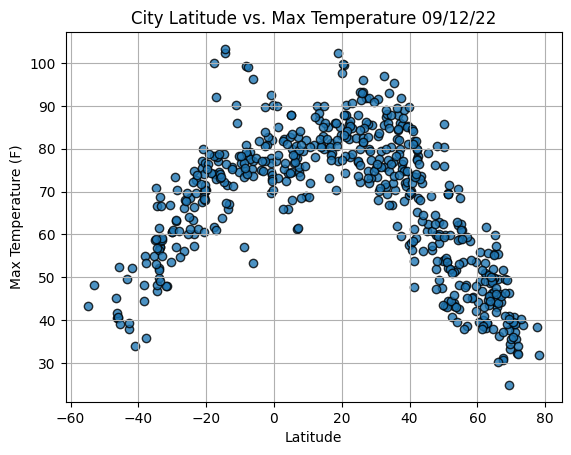

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

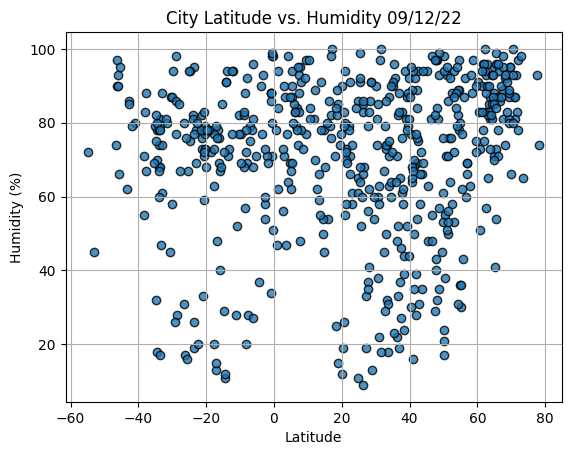

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

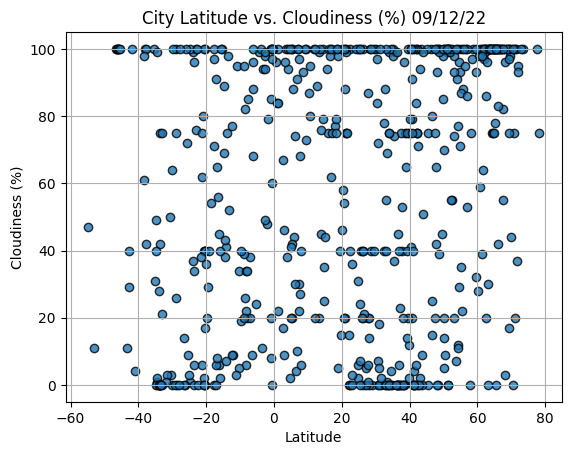

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

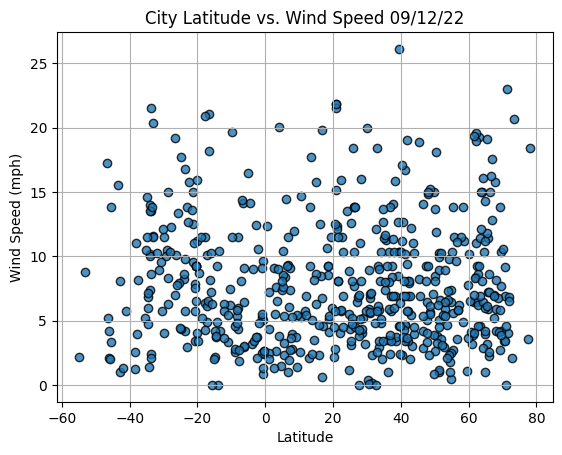

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()